<a href="https://colab.research.google.com/github/Khushboo162-gif/California-Housing-Model/blob/main/Tiger_VS_Bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [3]:
binaryclassifier = Sequential()

In [4]:
binaryclassifier.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))

In [5]:
binaryclassifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
binaryclassifier.add(Conv2D(32,(3,3),activation = 'relu'))
binaryclassifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
binaryclassifier.add(Flatten())

In [8]:
binaryclassifier.add(Dense(units = 128,activation = 'relu'))

binaryclassifier.add(Dense(units = 1,activation = 'sigmoid'))

In [9]:
binaryclassifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [10]:
###Training Dataset

In [11]:
from keras.preprocessing.image import ImageDataGenerator


train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Tiger vs Bear',
                                              target_size = (64,64),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 925 images belonging to 2 classes.


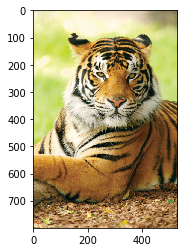

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
p = Image.open('/content/drive/MyDrive/Tiger vs Bear/tiger_images/10.Bengal-tiger.jpg')
plt.imshow(p,interpolation = 'nearest')
plt.show()

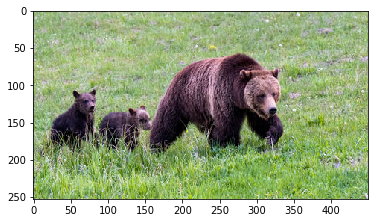

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
p = Image.open('/content/drive/MyDrive/Tiger vs Bear/Bear images/10.bears_16x9.jpg')
plt.imshow(p,interpolation = 'nearest')
plt.show()

In [15]:
###Testing Dataset

In [16]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Tiger vs Bear',
                                              target_size = (64,64),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 925 images belonging to 2 classes.


In [17]:
binaryclassifier.fit_generator(training_set,
                               steps_per_epoch = 1,
                               epochs = 25,
                               validation_data = test_set,
                               validation_steps = 20)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1/1 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.5938

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1/1 [==============================] - 235s 235s/step - loss: 0.6891 - accuracy: 0.5938 - val_loss: 0.7437 - val_accuracy: 0.6562
Epoch 2/25
1/1 [==============================] - 75s 75s/step - loss: 0.5953 - accuracy: 0.7500 - val_loss: 0.6311 - val_accuracy: 0.6656
Epoch 3/25
1/1 [==============================] - 32s 32s/step - loss: 0.4803 - accuracy: 0.8125 - val_loss: 0.5986 - val_accuracy: 0.6781
Epoch 4/25
1/1 [==============================] - 23s 23s/step - loss: 0.4822 - accuracy: 0.7812 - val_loss: 0.5847 - val_accuracy: 0.6734
Epoch 5/25
1/1 [==============================] - 20s 20s/step - loss: 0.6501 - accuracy: 0.6562 - val_loss: 0.5680 - val_accuracy: 0.6625
Epoch 6/25
1/1 [==============================] - 21s 21s/step - loss: 0.5627 - accuracy: 0.6250 - val_loss: 0.5706 - val_accuracy: 0.6906
Epoch 7/25
1/1 [==============================] - 21s 21s/step - loss: 0.5886 - accuracy: 0.5938 - val_loss: 0.5927 - val_accuracy: 0.7297
Epoch 8/25
1/1 [====================

In [18]:
history = binaryclassifier.fit_generator(training_set,
                                         steps_per_epoch = 10,
                                         epochs = 50,
                                         validation_data = test_set,
                                         validation_steps = 20)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7855

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 29s 3s/step - loss: 0.4538 - accuracy: 0.7855 - val_loss: 0.4204 - val_accuracy: 0.8062
Epoch 2/50
10/10 [==============================] - 28s 3s/step - loss: 0.4784 - accuracy: 0.7781 - val_loss: 0.4790 - val_accuracy: 0.7688
Epoch 3/50
10/10 [==============================] - 28s 3s/step - loss: 0.4193 - accuracy: 0.7937 - val_loss: 0.3960 - val_accuracy: 0.8031
Epoch 4/50
10/10 [==============================] - 28s 3s/step - loss: 0.3796 - accuracy: 0.8313 - val_loss: 0.3576 - val_accuracy: 0.8328
Epoch 5/50
10/10 [==============================] - 28s 3s/step - loss: 0.3625 - accuracy: 0.8469 - val_loss: 0.3869 - val_accuracy: 0.8328
Epoch 6/50
10/10 [==============================] - 28s 3s/step - loss: 0.3433 - accuracy: 0.8328 - val_loss: 0.5396 - val_accuracy: 0.7844
Epoch 7/50
10/10 [==============================] - 28s 3s/step - loss: 0.3870 - accuracy: 0.7969 - val_loss: 0.3248 - val_accuracy: 0.8625
Epoch 8/50
10/10 [=============

In [19]:
# save the model
from tensorflow.keras.models import load_model

binaryclassifier.save('/content/drive/MyDrive/Binary_Classification')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Binary_Classification/assets


In [20]:
#Summary

binaryclassifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

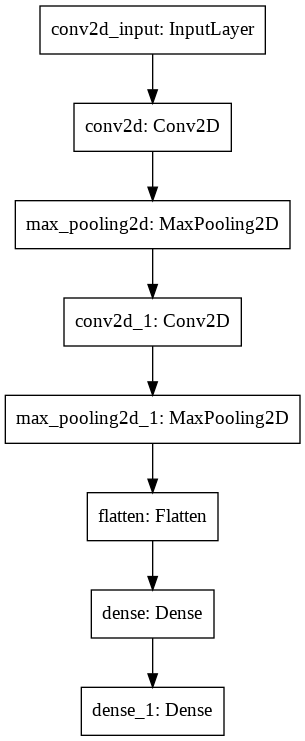

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(binaryclassifier,to_file='binary_classifier.png')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


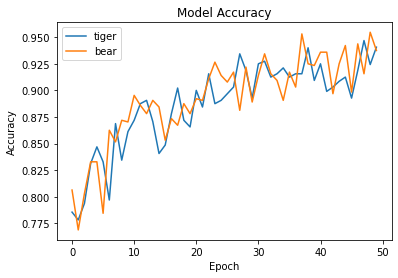

In [22]:
#plot the training and validation accuracy of the model
#list all the data in history

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['tiger','bear'],loc='upper left')
plt.show()

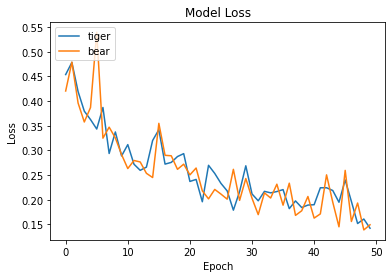

In [23]:
#plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tiger','bear'],loc='upper left')
plt.show()

In [28]:
#Confusion matrix

from glob import glob
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [29]:
Y_pred = binaryclassifier.predict(training_set)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm = confusion_matrix(training_set.classes,y_pred)
print(cm)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Confusion Matrix
[[312   0]
 [613   0]]


[[312   0]
 [613   0]]


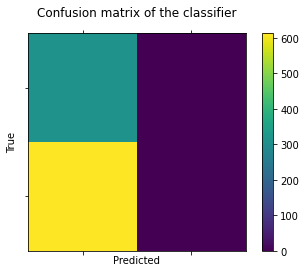

In [31]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
from tensorflow.keras.models import load_model

binaryclassifier.save('/content/drive/MyDrive/Binary_Classifier')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Binary_Classifier/assets
